# AS-AD model
Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [1]:
sm.init_printing(use_unicode=True)
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

#Defining symbols
pi_t = sm.symbols('pi_t')
pi_t2 = sm.symbols('pi_t-1')
y_t = sm.symbols('y_t')
y_t2 = sm.symbols('y_t-1')
v_t = sm.symbols('v_t')
s_t = sm.symbols('s_t')
s_t2 = sm.symbols('s_t-1')
alpha = sm.symbols('alpha')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')



## **Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.


### Answer for Q1

First, one start by defining the AD and SRAS functions, and then solving AD=SRAS with sympy solver for both $y_t$ and $\pi_t$.

The equilibrium for output y is:


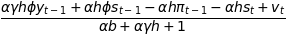

In [2]:
#Defining AD-curve
AD = sm.Eq(pi_t,(1/(h*alpha))*(v_t-(1+b*alpha)*y_t))
#Defining SRAS-curve
SRAS = sm.Eq(pi_t,pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
#Setting AD equal to SRAS and solving for equilibrium values of output, y*.
eq_1= sm.solve([AD, SRAS], [y_t, pi_t])
eq_y=eq_1[y_t]
print('The equilibrium for output y is:')
eq_y

The equilibrium for output pi is:


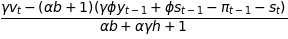

In [3]:
eq_pi=eq_1[pi_t]
print('The equilibrium for output pi is:')
eq_pi

In [4]:
#lambdifying for later use
pi_func = sm.lambdify((pi_t2, y_t2, v_t, s_t, s_t2, alpha, h, b, phi, gamma), eq_pi)
y_func = sm.lambdify((pi_t2, y_t2, v_t, s_t, s_t2, alpha, h, b, phi, gamma), eq_y)

Now, one an just set the paramter values to find the equilibrium given the paramter values through the same procedure as above.

In [5]:
#Setting parameter values

alpha = par['alpha']
h = par['h']
b = par['b']
phi = par['phi']
gamma = par['gamma']
#Resolving for equilibrium
AD_SRAS_val=sm.Eq((1/(h*alpha))*(v_t-(1+b*alpha)*y_t),pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
eq_y_val = sm.solve(AD_SRAS_val,y_t)
print('The equilibrium for output y given parameter values is:')
eq_y_val


The equilibrium for output y given parameter values is:


In [6]:
eq_pi_val=1/(h*alpha)*(v_t-(1+b*alpha)*eq_y_val[0])
print('The equilibrium for output pi given parameter values is:')
eq_pi_val

The equilibrium for output pi given parameter values is:


## **Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

### Answer to Q2

To find the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$, one needs to set the new values for the variables, and here, just re-solve the same problem as earlier. 

In [28]:
#Setting variable values - parameter is similar to previous questions
pi_t2 = 0
y_t2 = 0
v_t = 0
s_t = 0
s_t2 = 0

#Solving for equilibrium given variable values 
AD_SRAS_param=sm.Eq((1/(h*alpha))*(v_t-(1+b*alpha)*y_t),pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
eq_y_param = sm.solve(AD_SRAS_param,y_t)
eq_pi_param=1/(h*alpha)*(v_t-(1+b*alpha)*eq_y_param[0])
print('The equilibrium for output y given parameter and variable values is: %8.3f' % eq_y_param[0])
print('The equilibrium for output pi given parameter and variable values is: %8.3f' % eq_pi_param)

The equilibrium for output y given parameter and variable values is:    0.000
The equilibrium for output pi given parameter and variable values is:    0.000


With the assumption $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$, one can see that $\pi_t=y_t=0$ in equilibrium. 

Now, one can investigate how the equilibrium changes when $v_t=0.1$

In [8]:
#Solving for equilibrium given v_t=0.1
v_t2 = 0.1
AD_SRAS_param2=sm.Eq((1/(h*alpha))*(v_t2-(1+b*alpha)*y_t),pi_t2+gamma*y_t-phi*gamma*y_t2+s_t-phi*s_t2)
eq_y_param2 = sm.solve(AD_SRAS_param2,y_t)
eq_pi_param2=1/(h*alpha)*(v_t2-(1+b*alpha)*eq_y_param2[0])
print('The equilibrium for output y given parameter and variable values is: %8.4f' % eq_y_param2[0])
print('The equilibrium for output pi given parameter and variable values is: %8.4f' % eq_pi_param2)

The equilibrium for output y given parameter and variable values is:   0.0244
The equilibrium for output pi given parameter and variable values is:   0.0018


In the case of $v_t=0.1$ both $\pi_t$ and $y_t$ becomes positive but $y_t^*>\pi_t^*$

Now, lets illustrate the equilibria. First, one creates a vector consisting of the equilibrium values for $y_t$ and $\pi_t$, respectively. Next step is to construct a illustration of the equilibrium values for given values of $v_t$.

In [9]:
#Creating vector with equilibrium values for y_t and pi_t for given values of v_t
## Vector with equilibrium values for y
y_values=[]
y_values.append(eq_y_param[0])
y_values.append(eq_y_param2[0])
## Vector with equilibrium values for pi
pi_values=[]
pi_values.append(eq_pi_param)
pi_values.append(eq_pi_param2)

Text(0.5, 1.0, 'Equilibrium values for given values of $v_t$')

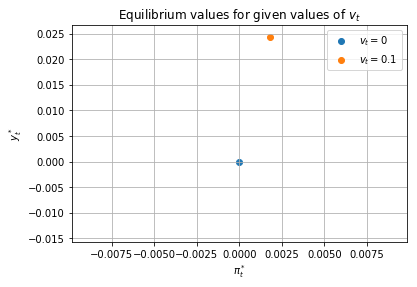

In [10]:
#Creating illustration of the equilibrium values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pi_values[0], y_values[0], label='$v_t=0$')
ax.scatter(pi_values[1], y_values[1], label='$v_t=0.1$')

#Setting up illustration
ax.grid()
ax.legend()
ax.set_ylabel('$y_t^*$')
ax.set_xlabel('$\pi_t^*$')
ax.set_title('Equilibrium values for given values of $v_t$')

## **Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

### Answer to Q3

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [11]:
par['delta'] = 0.80
par['omega'] = 0.15
delta = par['delta']
omega = par['omega']

Firstly, one needs to define the demand and supply disturbances as functions, set the value for the shocks, the amount of periods for the simulation to investigate the evolvement of the economy given $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$. Then, one can simulate the model. This will also be the order of solution.

In [12]:
#Defining demand and supply disturbances and vectors
v_t2 = sm.symbols('v_t2')
s_t2 = sm.symbols('s_t2')
v = lambda v_t2,x: delta*v_t2 + x
s = lambda s_t2,c: omega*s_t2 + c
v_vector = [0]
s_vector = [0]

#Defining amount of periods for simulation, demand and supply shock vectors. 
T = 200
x = np.zeros(T)
c = np.zeros(T)
x[1] = 0.1 

Now, one can run a loop to simulate the model for T periods.

In [13]:
y_output = [0]
pi_inflation = [0]
#Running simulation of the model
for t in range (1,T):
    v_vector.append(v(v_vector[t-1], x[t]))
    s_vector.append(s(s_vector[t-1], c[t]))

In [14]:
for t in range(1,T):
    y_output.append(y_func(pi_inflation[t-1], y_output[t-1], v_vector[t], s_vector[t], s_vector[t-1], alpha, h, b, phi, gamma))
    pi_inflation.append(pi_func(pi_inflation[t-1], y_output[t-1], v_vector[t], s_vector[t], s_vector[t-1], alpha, h, b, phi, gamma))

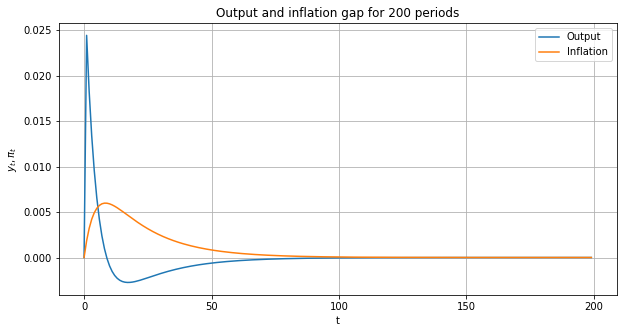

In [15]:
#Creating illustration of the equilibrium values
fig = plt.figure(figsize= (10,5))
bx = fig.add_subplot(1,1,1)
bx.plot(range(0,200,1), y_output, label = 'Output')
bx.plot(range(0,200,1), pi_inflation, label = 'Inflation')

#Setting up illustration
bx.legend()
bx.grid()
bx.set_xlabel('t') # 
bx.set_ylabel('$y_t, \pi_t$')
bx.set_title('Output and inflation gap for 200 periods')
plt.xticks(range(0, 201, 50))
plt.show()

One can see that the output has a faster convergence than inflation given $v_t$. Additionally, the output reacts immediately to the shock, whereas the inflation gap reacts slower to the demand shock.

## **Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

### Answer Q4

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [40]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2
sigma_x = par['sigma_x']
sigma_c = par['sigma_c']

The following will be more or less equal to the simulation from **Q3**. Just with the modelling of stochastic shocks which are normally distributed. Firstly, one define the stochastic process and then run the simulation

In [17]:
#Defining stochastic shocks
np.random.seed(127)
T=1000
x = np.random.normal(loc = 0, scale=sigma_x, size =T)
c = np.random.normal(loc = 0, scale=sigma_c, size =T)

Now, one can start simulating the model for which a function, simulate, is defined.

In [31]:
#Defining simulating function
def simulate(T,phi_var):
    #Defining empty lists / Assuming y_{-1} = \pi_{-1} = s_{-1} = 0
    v_vector2 = [0]
    s_vector2 = [0]
    pi_inflation2 = [0]
    y_output2 = [0]
    for t in range(1,T):
        v_vector2.append(v(v_vector2[t-1], x[t])) 
        s_vector2.append(s(s_vector2[t-1], c[t]))
        #new output and inflation 
        y_output2.append(y_func(pi_inflation2[t-1], y_output2[t-1], v_vector2[t], s_vector2[t], s_vector2[t-1], alpha, h, b, phi_var, gamma))
        pi_inflation2.append(pi_func(pi_inflation2[t-1], y_output2[t-1], v_vector2[t], s_vector2[t], s_vector2[t-1], alpha, h, b, phi_var, gamma))
    #Converting to numpy arrays 
    y_output_sol=np.array(y_output2)
    pi_inflation_sol=np.array(pi_inflation2)
    return y_output_sol, pi_inflation_sol

#Simulation of the model
y_output_sol, pi_inflation_sol = simulate(T,phi)

#Printing the results
print('Variance of y is %8.3f' % y_output_sol.var())
print('Variance of pi is %8.3f' % pi_inflation_sol.var())
print('Correlation between y and $\pi$ is %8.3f' % np.corrcoef(y_output_sol, pi_inflation_sol)[1,0])
print('Auto-correlation between $y_t$ and $y_t-1$ is %8.3f' % np.corrcoef(y_output_sol[1:], y_output_sol[:-1])[1,0])
print('Auto-correlation between $pi_t$ and $\pi_t-1$ is %8.3f' % np.corrcoef(pi_inflation_sol[1:], pi_inflation_sol[:-1])[1,0]) 

Variance of y is    1.993
Variance of pi is    1.039
Correlation between y and $\pi$ is   -0.167
Auto-correlation between $y_t$ and $y_t-1$ is    0.775
Auto-correlation between $pi_t$ and $\pi_t-1$ is    0.980


As expected $y$ has larger variance than $\phi$ due to the demand shock. The negative correlation between $y$ and $\pi$ reflects, the inflation gap decreases as/if the output gap increases. 

## **Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

### Answer to Q5

To plot the correlation between inflation and output, one need to simulate output and inflation for different values of $\phi$. The simulation from **Q4** will be used, and then the saved to be plotted.

In [21]:
#Definning new phi and empty list for simulation / Assuming y_{-1} = \pi_{-1} = s_{-1} = 0

phi_new = np.linspace(0,1,10)
y_sim = {}
pi_sim = {}
corr_ypi = []


In [32]:
#Simulation with changes in phi
for i,p in enumerate(phi_new):
    pi_sim['pi_inflation3_%s' % i], y_sim['y_output3_%s' % i] = simulate(T, phi_new[i])
    corr_ypi.append(np.corrcoef(y_sim['y_output3_%s' %i], pi_sim['pi_inflation3_%s' % i])[1,0])

One can now illustrate the correlation for different values of $\phi$. This is perfomed below.

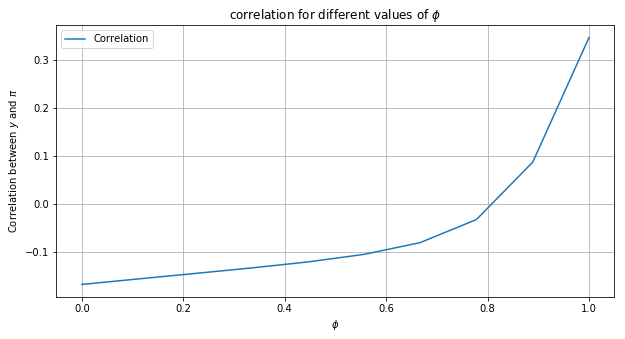

In [23]:
#Creating illustration of the equilibrium values
fig = plt.figure(figsize= (10,5))
cx = fig.add_subplot(1, 1, 1)
cx.plot(phi_new, corr_ypi, label = 'Correlation')

#Setting up illustration
cx.grid()
cx.legend()
cx.set_ylabel('Correlation between $y$ and $\pi$')
cx.set_xlabel('$\phi$')
cx.set_title('Correlation for different values of $\phi$')
plt.show()

One can see from the illustration that when $corr(y_t,\pi_t)=0.31$, the value of $\phi$ is approaching  a values close to 1. To investigate this one can use the optimize module from the sympy packages. Define an objective, s olving the objective to finally print the result.

In [30]:
#Objective
obj = lambda phi: np.corrcoef(simulate(T, phi)[0], simulate(T, phi)[1])[1,0] - 0.31

#Optimizing
phi_opt = optimize.root_scalar(obj, x0 = 0.8, bracket = [0,1], method = 'bisect')

#Result
sol = phi_opt.flag
phi_opt = phi_opt.root
print('Optimal values of phi to find corr(y_t,pi_t)=0.31: %8.3f' % phi_opt)
print('Correlation for optimal phi: %8.3f' % np.corrcoef(simulate(T, phi_opt)[0], simulate(T, phi_opt)[1])[1,0])

Optimal values of phi to find corr(y_t,pi_t)=0.31:    0.983
Correlation for optimal phi:    0.310


## **Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

**Answer to Q6**:
We have tried to come up with a solution but no luck. This is one of the attempts did not work.

#Defining simulation smiliar to the one above
def simulate3(x):
    #Assuming y_{-1} = \pi_{-1} = s_{-1} = 0
    v_vector3 = [0]
    s_vector3 = [0]
    pi_inflation3 = [0]
    y_output3 = [0]
    corr_ypi3 = []
    
    #Disturbances
    np.random.seed(3)
    sigma_x = par['sigma_x']
    sigma_c = par['sigma_c']
    x = np.random.normal(loc = 0, scale=sigma_x, size =T)
    c = np.random.normal(loc = 0, scale=sigma_c, size =T)

    #Simulation
    for i in range(1,10):
        v_vector3.append(v(v_vector3[t-1], x[t])) 
        s_vector3.append(s(s_vector3[t-1], c[t]))
        #new output and inflation 
        y_output3.append(y_func(pi_inflation3[t-1], y_output3[t-1], v_vector3[t], s_vector3[t], s_vector3[t-1], alpha, h, b, phi_var, gamma))
        pi_inflation3.append(pi_func(pi_inflation3[t-1], y_output3[t-1], v_vector3[t], s_vector3[t], s_vector3[t-1], alpha, h, b, phi_var, gamma))
    #Converting to numpy arrays 
    y_output_sol3=np.array(y_output3)
    pi_inflation_sol3=np.array(pi_inflation3)

    #Statistics
    y_var=np.var(y_output3)
    pi_var=np.inflation = np.var(pi_inflation3)
    corr_ypi=np.corrcoef(y_output_sol3, pi_inflation_sol3)[1,0]
    pi_ac = np.corrcoef(y_output_sol[1:], y_output_sol[:-1])[1,0]
    y_ac = np.corrcoef(pi_inflation_sol[1:], pi_inflation_sol[:-1])[1,0]
    
    #Differences from the US businees cycle data / squarred to aviod negative
    y_diff = (y_var - 1.64)**2
    pi_diff = (var_inflation - 0.21)**2
    corr_ypi_diff = (corr_ypi - 0.31)**2 #squared difference
    pi_ac_doff = (pi_ac - 0.84)**2
    y_ac_fiff = (y_ac - 0.48)**2

    #Sum of differences
    sum_diff=sum([y_diff, pi_diff, corr_ypi_diff, pi_ac_diff, y_ac_diff])
    
    return sum_diff

#Defining objective, guess and bounds for optimizer
obj = lambda sim: simulate3(sim)
x0 = (phi_opt, sigma_x, sigma_c)
bounds = [[0,1], [0,100], [0,100]]

#Simulation and solving the problem with scipy minimizer
sol = optimize.minimize(obj, x0=x0, method='L-BFGS-B', bounds=bounds)